# Лабораторная работа 8. Построение пайплайна одномерной регрессии

## <a href="https://www.kaggle.com/datasets/mahad049/college-placement">Распределение студентов по IQ и CGPA*</a>
<i>CGPA - это среднее значение всех оценок, полученных студентом за всю академическую карьеру, и используется для оценки общей успеваемости студента в колледже.</i>

### Описание набора данных:
Этот набор данных содержит записи об атрибутах учащихся и их соответствующем статусе зачисления. Он включает в себя такую информацию, как: город проживания или местонахождение учебного заведения, совокупный средний балл успеваемости (CGPA), показатели коэффициента интеллекта (IQ) и двоичный показатель, указывающий, получил ли студент работу или стажировку. Набор данных представляет собой комбинацию числовых и категориальных данных, при этом в некоторых записях присутствуют экземпляры пропущенных значений.

### Прилагающаяся информация:
Набор данных дает представление о характеристиках студентов и результатах их трудоустройства, включая: город проживания, средний балл аттестата зрелости, показатели IQ и статус трудоустройства. Он предоставляет ценные данные для анализа факторов, влияющих на трудоустройство студентов, помогая учебным заведениям и рекрутерам в разработке стратегий для улучшения результатов трудоустройства.

### Назначение набора данных и возможные модели:

1) city - <b>Категориальное</b> - Город, в котором проходит обучение
2) cgpa - <b>Дробное</b> - количество баллов CGPA
3) iq - <b>Дробное</b> - коичество баллов IQ студента
4) placement - <b>Целое</b> - статус трудоустройства (1 - трудоустроен, 0 - не трудоустроен)

Подключение библиотек

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

Загрузка данных 

In [13]:
dataset = pd.read_csv('placement-dataset.csv')

dataset.head()

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1
4,Los Angeles,5.8,142.0,0


Разделение на матрицу признаков и зависимую переменную

In [32]:
X = dataset.iloc[:, 1:-2].values
y = dataset.iloc[:, 2].values

print ("Матрица признаков", X[:5])
print ("Зависимая переменная", y[:5])

Матрица признаков
[[6.8]
 [5.9]
 [nan]
 [7.4]
 [5.8]]
Зависимая переменная
[123. 106. 121. 132. 142.]


Обработка пропущенных значений (опционально)

In [44]:
from sklearn.impute import SimpleImputer
import numpy as np


X = X.reshape(-1, 1)

# Создание экземпляра SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Обучение импутера на данных
X = imputer.fit_transform(X)

y = y.reshape(-1, 1)

# Создание отдельного экземпляра SimpleImputer для y
imputer2 = SimpleImputer(missing_values=np.nan, strategy='mean')

# Обучение импутера на данных
y = imputer2.fit_transform(y)

# Вывод обновленных наборов данных
print(X)
print(y)

[[6.8       ]
 [5.9       ]
 [5.96521739]
 [7.4       ]
 [5.8       ]
 [7.1       ]
 [5.7       ]
 [5.        ]
 [6.1       ]
 [5.1       ]
 [6.        ]
 [6.9       ]
 [5.4       ]
 [6.4       ]
 [5.96521739]
 [5.1       ]
 [5.2       ]
 [3.3       ]
 [4.        ]
 [5.2       ]
 [6.6       ]
 [7.1       ]
 [4.9       ]
 [5.96521739]
 [4.7       ]
 [5.        ]
 [7.        ]
 [6.        ]
 [5.2       ]
 [5.96521739]
 [7.6       ]
 [3.9       ]
 [7.        ]
 [6.        ]
 [4.8       ]
 [6.8       ]
 [5.7       ]
 [8.1       ]
 [6.5       ]
 [4.6       ]
 [4.9       ]
 [5.4       ]
 [7.6       ]
 [5.96521739]
 [7.5       ]
 [6.        ]
 [5.3       ]
 [5.2       ]
 [6.6       ]
 [5.4       ]
 [3.5       ]
 [4.8       ]
 [5.96521739]
 [8.3       ]
 [6.4       ]
 [7.8       ]
 [6.1       ]
 [6.5       ]
 [8.        ]
 [4.8       ]
 [5.96521739]
 [7.3       ]
 [6.        ]
 [6.3       ]
 [7.        ]
 [8.1       ]
 [6.9       ]
 [5.        ]
 [4.        ]
 [8.5       ]
 [6.3       ]
 [6.1 

In [52]:
# Сортировка массива X
X = np.sort(X, axis=0)

# Сортировка массива y
y = np.sort(y, axis=0)

Замена категории кодом (LabelEncoder)

In [ ]:
from sklearn.preprocessing import LabelEncoder


label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)


Преобразования категориальных меток в числовые значения (OneHotEncoder)

In [ ]:
from sklearn.preprocessing import OneHotEncoder


label_encoder_X = LabelEncoder()
X[:, 0] = label_encoder_X.fit_transform(X[:, 0])

onehotencoder = OneHotEncoder(categorical_features = [0])
X = onehotencoder.fit_transform(X).toarray()

Разделение выборки на тестовую и тренировочную

In [53]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0) 

# X и y - представляют собой признаки и целевую переменную соответственно
# test_size = 1/4 - указывает, что 25% данных будут выделены для тестового набора,
# а оставшиеся 75% будут использованы для обучения модели
# random_state = 0 - фиксирует генерацию случайных чисел, что гарантирует 
# воспроизводимость разделения данных. При использовании одного 
# и того же random_state результаты разделения будут одинаковыми при каждом запуске.

Обучение линейной модели регрессии
<br/><i>Линейная регрессия - метод восстановления зависимости между двумя переменными</i>

In [54]:
from sklearn.linear_model import LinearRegression


regressor = LinearRegression()

regressor.fit(X_train, y_train)

LinearRegression()

Предсказание, обработка и визуализация результатов

In [55]:
y_pred = regressor.predict(X_test)

print(y_pred)

[[ 85.00796978]
 [170.93523872]
 [ 38.13855035]
 [120.16003435]
 [151.40631396]
 [182.65259358]
 [ 77.19639987]
 [147.50052901]
 [120.16003435]
 [198.27573339]
 [120.16003435]
 [182.65259358]
 [155.31209891]
 [ 73.29061492]
 [ 57.66747511]
 [ 88.91375473]
 [ 81.10218483]
 [ 85.00796978]
 [ 96.72532463]
 [ 65.47904502]
 [116.25424939]
 [131.8773892 ]
 [ 42.0443353 ]
 [143.59474406]
 [118.80150045]]


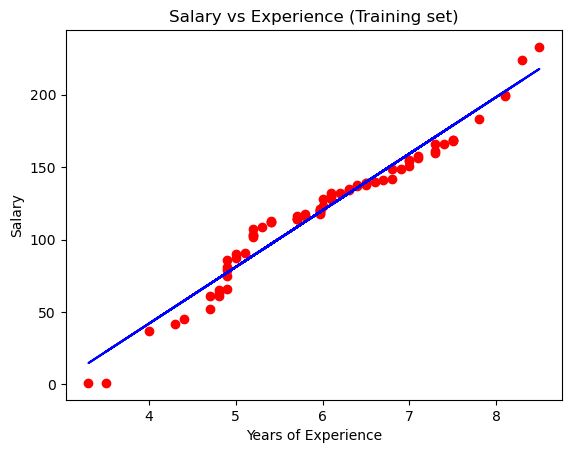

In [56]:
# Отображание точкек данных обучающего набора
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

plt.title('Salary vs Experience (Training set)')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.show()

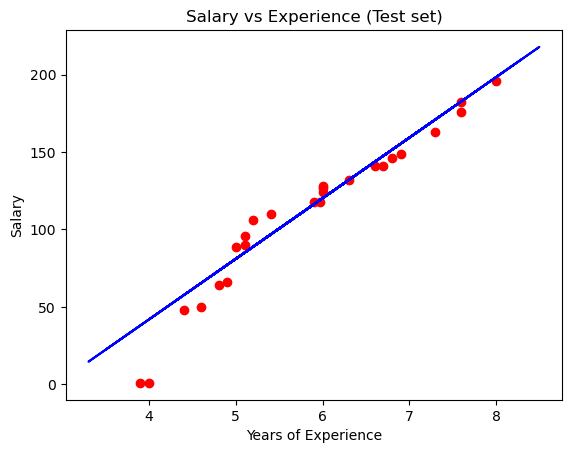

In [57]:
# Отображание точкек данных тестового набора
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')

plt.title('Salary vs Experience (Test set)')

plt.xlabel('Years of Experience')
plt.ylabel('Salary')

plt.show()

### Вывод:
Модель линейной регрессии - это статистическая модель, используемая для оценки отношения между зависимой переменной и одной или несколькими независимыми переменными. В основе линейной регрессии лежит предположение о линейной зависимости между переменными. Модель пытается найти линейную функцию, которая наилучшим образом соответствует данным путем минимизации суммы квадратов разностей между фактическими и предсказанными значениями.


Линейная регрессия широко используется для прогнозирования и моделирования в различных областях, таких как: экономика, финансы, социология, биология и многие другие. В машинном обучении линейная регрессия также применяется для решения задач предсказания значений на основе входных признаков.